# EDA

In [114]:
import numpy as np 
import pandas as pd
# pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_excel("news_share_data.xlsx")

In [116]:
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [5]:
df.shape

(1003, 22)

In [6]:
df.isnull().sum()

article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1003, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

1100     62
1300     44
1200     41
1400     38
1500     32
         ..
703       1
16900     1
13100     1
718       1
851       1
Name: shares, Length: 324, dtype: int64

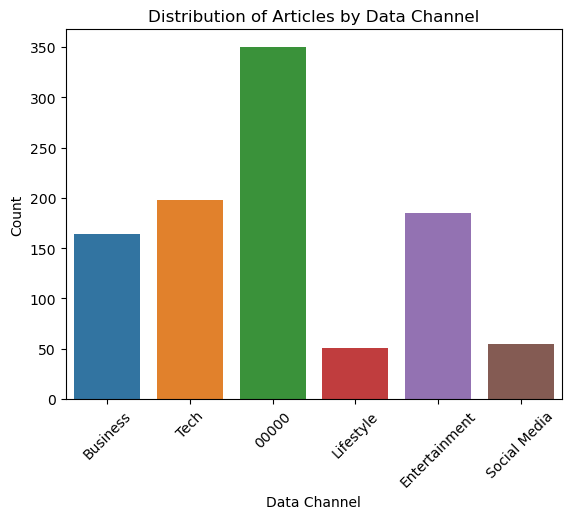

In [12]:
sns.countplot(x='data_channel', data=df)
plt.xlabel('Data Channel')
plt.ylabel('Count')
plt.title('Distribution of Articles by Data Channel')
plt.xticks(rotation=45)
plt.show()

In [117]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['day'] = df['published_date'].dt.day
df['month'] = df['published_date'].dt.month
df['year'] = df['published_date'].dt.year

In [14]:
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,31,3,2014
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,1,4,2014
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,1,4,2014
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,1,4,2014
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,1,4,2014


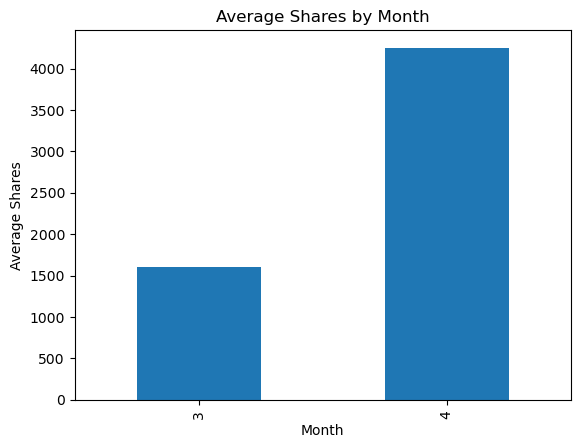

In [15]:
df.groupby('month')['shares'].mean().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Shares')
plt.title('Average Shares by Month')
plt.show()

Text(0.5, 1.0, 'Relationship Between Data Channels and their Shares')

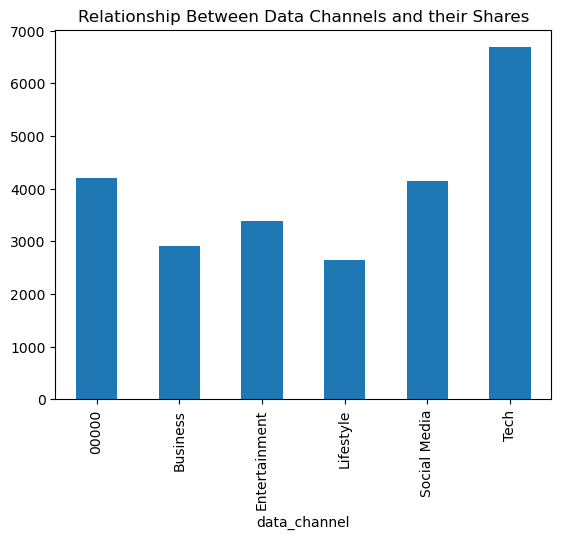

In [16]:
df.groupby("data_channel")["shares"].mean().plot(kind="bar")
plt.title("Relationship Between Data Channels and their Shares")

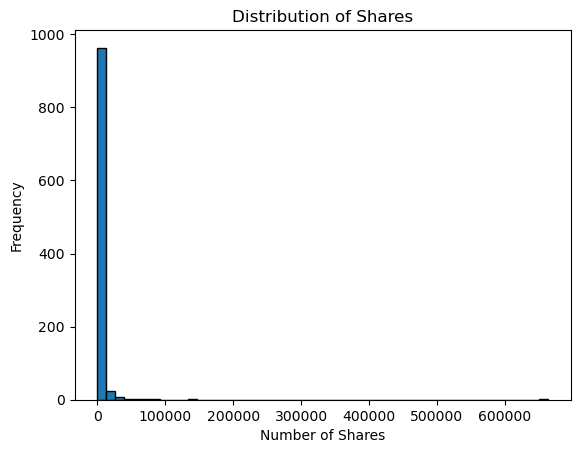

In [17]:
plt.hist(df['shares'], bins=50, edgecolor='k')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.title('Distribution of Shares')
plt.show()

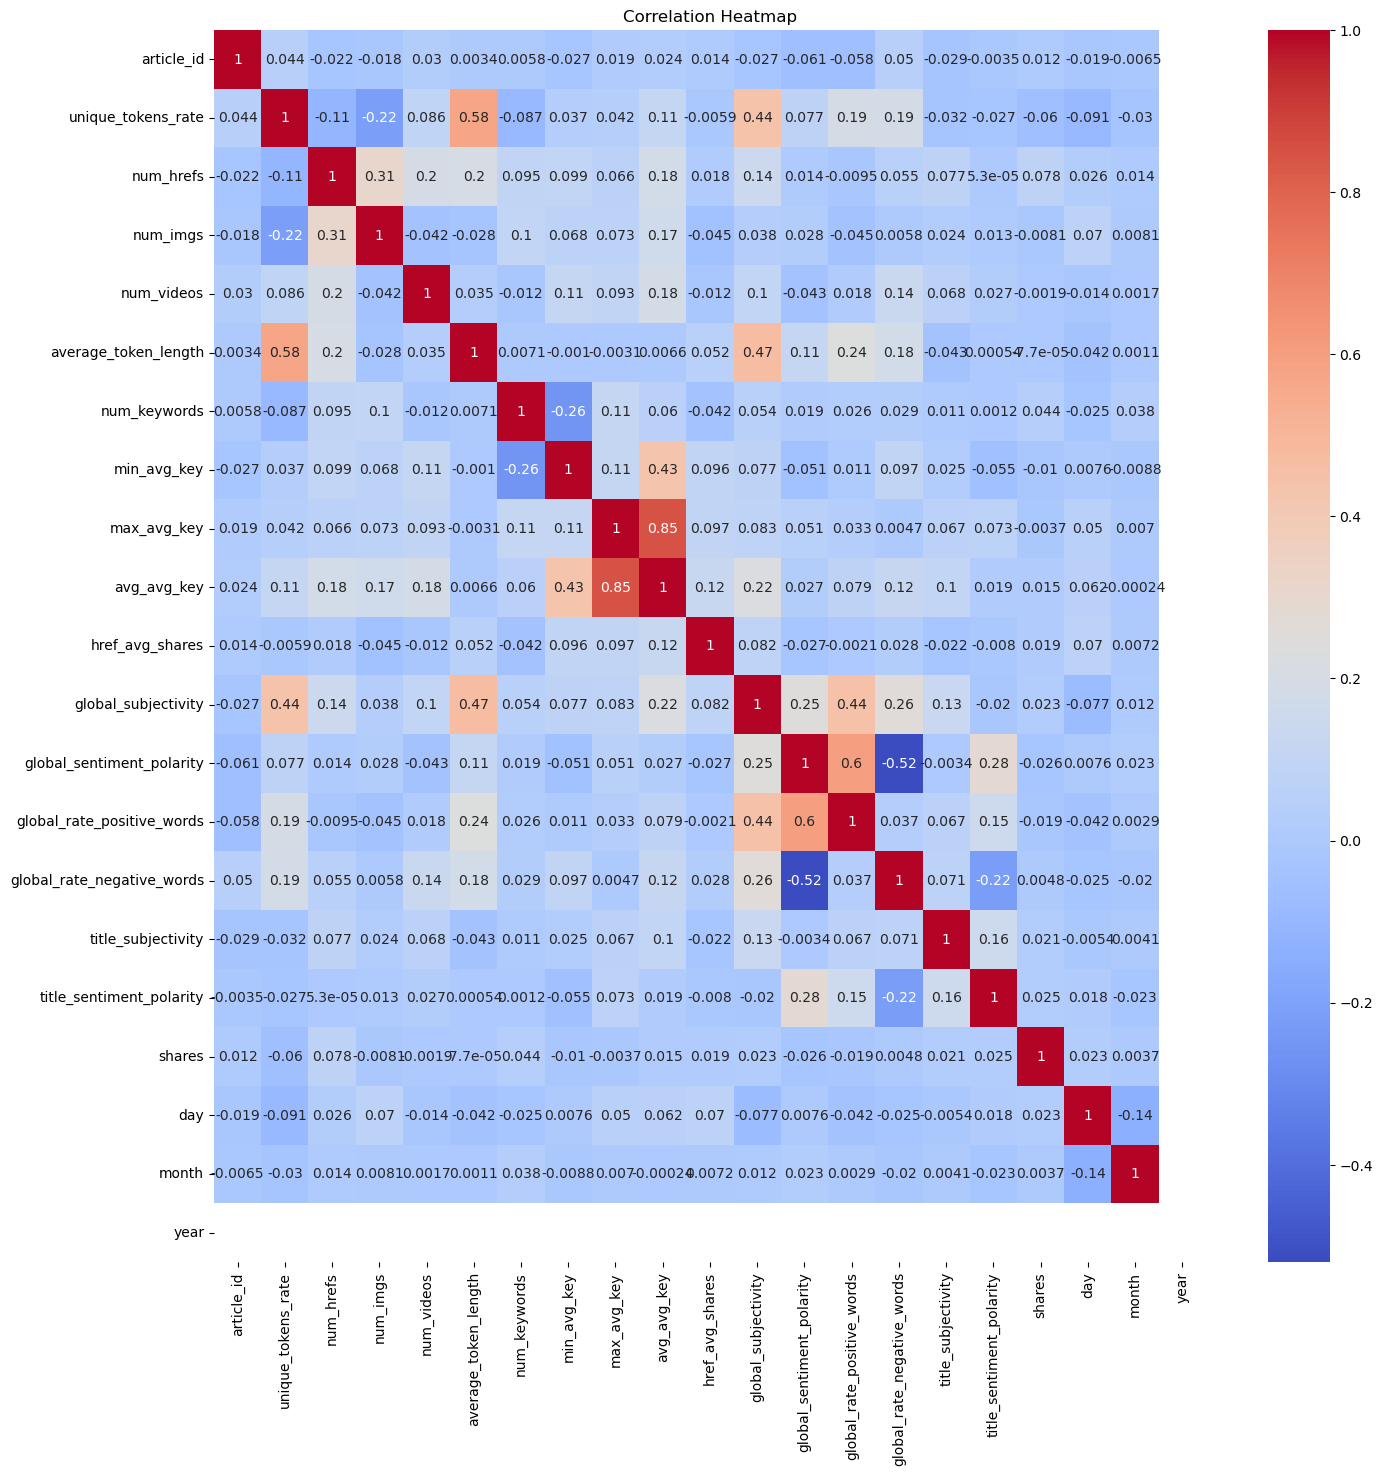

In [18]:
plt.figure(figsize=(16,16))
correlation_matrix = df.corr()

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df.head(1)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.5,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.02449,0.25,0.25,1600,31,3,2014


In [77]:
# df.drop("published_date",axis=1,inplace=True)

In [20]:
df.head(1)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.5,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.02449,0.25,0.25,1600,31,3,2014


In [21]:
df.groupby("day")["shares"].mean()

day
1      2463.101449
2      2191.345679
3      2499.168675
4      3401.271186
5      4690.476190
6      5119.933333
7      4383.169231
8      3776.012821
9     11694.840000
10     4058.125000
11     2746.075472
12     2857.692308
13     5965.275862
14     6761.180328
15     4351.214286
16     2617.458333
17     3512.879310
31     1600.000000
Name: shares, dtype: float64

In [22]:
df["shares"]

0       1600
1       1500
2       1400
3       1300
4       3000
        ... 
998     1300
999     1100
1000    4400
1001    1900
1002     949
Name: shares, Length: 1003, dtype: int64

In [118]:
import pandas as pd


correlation_matrix = df.corr()

correlation_with_shares = correlation_matrix['shares'].drop('shares')  


correlation_with_shares = correlation_with_shares.abs().sort_values(ascending=False)

# Display the correlations
print(correlation_with_shares)


num_hrefs                     0.077955
unique_tokens_rate            0.060329
num_keywords                  0.044015
global_sentiment_polarity     0.025610
title_sentiment_polarity      0.024815
day                           0.023021
global_subjectivity           0.022757
title_subjectivity            0.021480
global_rate_positive_words    0.019037
href_avg_shares               0.018945
avg_avg_key                   0.015171
article_id                    0.012057
min_avg_key                   0.010040
num_imgs                      0.008089
global_rate_negative_words    0.004837
max_avg_key                   0.003706
month                         0.003701
num_videos                    0.001938
average_token_length          0.000077
year                               NaN
Name: shares, dtype: float64


In [119]:
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,31,3,2014
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,1,4,2014
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,1,4,2014
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,1,4,2014
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,1,4,2014


In [25]:
df.isnull().sum()

article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
day                           0
month                         0
year                          0
dtype: int64

Near-Zero Correlations (Features with very weak influence on "shares"):
15. global_rate_negative_words: 0.004837

    max_avg_key: 0.003706
    month: 0.003701
    num_videos: 0.001938
    average_token_length: 0.000077

No Correlation (NaN):
20. year

# Outlier Handling

In [120]:
df.describe().round()

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year
count,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0
mean,6915159.0,1.0,12.0,5.0,1.0,5.0,7.0,1131.0,6463.0,3359.0,13518.0,0.0,0.0,0.0,0.0,0.0,0.0,4247.0,9.0,4.0,2014.0
std,482389.0,0.0,15.0,8.0,4.0,1.0,2.0,1181.0,7455.0,1468.0,51499.0,0.0,0.0,0.0,0.0,0.0,0.0,22610.0,5.0,0.0,0.0
min,2195051.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3569.0,1360.0,0.0,0.0,-0.0,0.0,0.0,0.0,-1.0,58.0,1.0,3.0,2014.0
25%,7006102.0,0.0,4.0,1.0,0.0,4.0,6.0,0.0,3613.0,2533.0,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,4.0,4.0,2014.0
50%,7013065.0,1.0,8.0,2.0,0.0,5.0,7.0,984.0,4636.0,3005.0,2767.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,9.0,4.0,2014.0
75%,7027570.0,1.0,14.0,7.0,1.0,5.0,9.0,2117.0,6562.0,3809.0,7341.0,1.0,0.0,0.0,0.0,0.0,0.0,3100.0,14.0,4.0,2014.0
max,7041291.0,1.0,162.0,84.0,51.0,7.0,10.0,3613.0,102200.0,17604.0,663600.0,1.0,0.0,0.0,0.0,1.0,1.0,663600.0,31.0,4.0,2014.0


In [31]:
# num_hrefs,num_imgs,num_videos,max_avg_key,avg_avg_key,href_avg_shares

In [121]:
cols_to_treat = ["num_hrefs","num_imgs","num_videos","max_avg_key","avg_avg_key","href_avg_shares"]

print("\nDistribution (raw):")
display(df[cols_to_treat].describe())        

# Outlier treatment
def clip_outliers(df,col):
    q_l = df[col].min()
    q_h = df[col].quantile(0.95)
    df[col] = df[col].clip(lower = q_l, upper = q_h)
    return df

for col in cols_to_treat:
    df = clip_outliers(df,col)
    

print("\nDistribution (after outlier treatment):")
display(df[cols_to_treat].describe())  


Distribution (raw):


,num_hrefs,num_imgs,num_videos,max_avg_key,avg_avg_key,href_avg_shares
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,11.720837,5.188435,1.215354,6463.258234,3359.478830,13518.302031
std,15.181597,8.495002,4.079730,7455.421154,1467.674637,51499.106509
min,0.000000,0.000000,0.000000,3568.870000,1360.101000,0.000000
25%,4.000000,1.000000,0.000000,3613.040000,2533.297000,1300.000000
50%,8.000000,2.000000,0.000000,4635.807000,3004.755000,2766.667000
75%,14.000000,7.000000,1.000000,6561.910000,3809.005000,7341.000000
max,162.000000,84.000000,51.000000,102200.000000,17604.270000,663600.000000



Distribution (after outlier treatment):


,num_hrefs,num_imgs,num_videos,max_avg_key,avg_avg_key,href_avg_shares
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,10.395813,4.580259,0.634098,5546.328503,3253.750034,7070.637844
std,8.264578,5.885661,1.052852,2351.984209,1039.975808,11158.376049
min,0.000000,0.000000,0.000000,3568.870000,1360.101000,0.000000
25%,4.000000,1.000000,0.000000,3613.040000,2533.297000,1300.000000
50%,8.000000,2.000000,0.000000,4635.807000,3004.755000,2766.667000
75%,14.000000,7.000000,1.000000,6561.910000,3809.005000,7341.000000
max,33.000000,21.000000,4.000000,11800.000000,5638.779700,45940.000000


# Feature Engineering

In [122]:
df.describe().round()

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year
count,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0
mean,6915159.0,1.0,10.0,5.0,1.0,5.0,7.0,1131.0,5546.0,3254.0,7071.0,0.0,0.0,0.0,0.0,0.0,0.0,4247.0,9.0,4.0,2014.0
std,482389.0,0.0,8.0,6.0,1.0,1.0,2.0,1181.0,2352.0,1040.0,11158.0,0.0,0.0,0.0,0.0,0.0,0.0,22610.0,5.0,0.0,0.0
min,2195051.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3569.0,1360.0,0.0,0.0,-0.0,0.0,0.0,0.0,-1.0,58.0,1.0,3.0,2014.0
25%,7006102.0,0.0,4.0,1.0,0.0,4.0,6.0,0.0,3613.0,2533.0,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,4.0,4.0,2014.0
50%,7013065.0,1.0,8.0,2.0,0.0,5.0,7.0,984.0,4636.0,3005.0,2767.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,9.0,4.0,2014.0
75%,7027570.0,1.0,14.0,7.0,1.0,5.0,9.0,2117.0,6562.0,3809.0,7341.0,1.0,0.0,0.0,0.0,0.0,0.0,3100.0,14.0,4.0,2014.0
max,7041291.0,1.0,33.0,21.0,4.0,7.0,10.0,3613.0,11800.0,5639.0,45940.0,1.0,0.0,0.0,0.0,1.0,1.0,663600.0,31.0,4.0,2014.0


In [123]:
import pandas as pd


correlation_matrix = df.corr()

correlation_with_shares = correlation_matrix['shares'].drop('shares')  


correlation_with_shares = correlation_with_shares.abs().sort_values(ascending=False)

print(correlation_with_shares)


num_hrefs                     0.074301
href_avg_shares               0.065409
unique_tokens_rate            0.060329
num_keywords                  0.044015
avg_avg_key                   0.027467
global_sentiment_polarity     0.025610
title_sentiment_polarity      0.024815
day                           0.023021
global_subjectivity           0.022757
title_subjectivity            0.021480
global_rate_positive_words    0.019037
max_avg_key                   0.014456
num_videos                    0.012330
article_id                    0.012057
min_avg_key                   0.010040
global_rate_negative_words    0.004837
month                         0.003701
num_imgs                      0.002003
average_token_length          0.000077
year                               NaN
Name: shares, dtype: float64


In [124]:
df['multimedia_content'] = df['num_hrefs'] + df['num_imgs'] + df['num_videos']

In [125]:
import pandas as pd


correlation_matrix = df.corr()

correlation_with_shares = correlation_matrix['shares'].drop('shares')  


correlation_with_shares = correlation_with_shares.abs().sort_values(ascending=False)

print(correlation_with_shares)


num_hrefs                     0.074301
href_avg_shares               0.065409
unique_tokens_rate            0.060329
multimedia_content            0.052050
num_keywords                  0.044015
avg_avg_key                   0.027467
global_sentiment_polarity     0.025610
title_sentiment_polarity      0.024815
day                           0.023021
global_subjectivity           0.022757
title_subjectivity            0.021480
global_rate_positive_words    0.019037
max_avg_key                   0.014456
num_videos                    0.012330
article_id                    0.012057
min_avg_key                   0.010040
global_rate_negative_words    0.004837
month                         0.003701
num_imgs                      0.002003
average_token_length          0.000077
year                               NaN
Name: shares, dtype: float64


In [126]:
df["multimedia_content"].describe()

count    1003.000000
mean       15.610169
std        11.820538
min         1.000000
25%         7.000000
50%        11.000000
75%        21.000000
max        58.000000
Name: multimedia_content, dtype: float64

In [127]:
df["multimedia_content"].quantile(0.95)

39.0

In [128]:
import pandas as pd



df['published_date'] = pd.to_datetime(df['published_date'])

df.set_index('published_date', inplace=True)

rolling_average_7days = df['shares'].rolling(window='7D').mean()

# Add the rolling average as a new column
df['rolling_avg_7days'] = rolling_average_7days

# Display the updated DataFrame
df.head()


,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year,multimedia_content,rolling_avg_7days
published_date,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-03-31,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,31,3,2014,9,1600.0
2014-04-01,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,1,4,2014,5,1550.0
2014-04-01,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,1,4,2014,9,1500.0
2014-04-01,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,1,4,2014,5,1450.0
2014-04-01,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,1,4,2014,15,1760.0


In [129]:
df.reset_index(inplace=True)

In [130]:
df

,published_date,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year,multimedia_content,rolling_avg_7days
0,2014-03-31,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600,31,3,2014,9,1600.000000
1,2014-04-01,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500,1,4,2014,5,1550.000000
2,2014-04-01,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400,1,4,2014,9,1500.000000
3,2014-04-01,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300,1,4,2014,5,1450.000000
4,2014-04-01,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000,1,4,2014,15,1760.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2014-04-17,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6,2,0,4.913978,4,Business,3329.921,5709.823,4020.608,1950.000,0.493519,-0.119440,0.005376,0.021505,0.000000,0.000000,1300,17,4,2014,8,4092.347945
999,2014-04-17,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4,2,0,4.674627,6,Tech,0.000,4352.491,2358.572,4200.000,0.455042,0.191196,0.053731,0.011940,0.000000,0.000000,1100,17,4,2014,6,4084.172131
1000,2014-04-17,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3,0,2,4.177665,9,Entertainment,2126.118,6060.771,3296.052,3400.000,0.522917,0.009809,0.025381,0.045685,0.600000,-0.600000,4400,17,4,2014,5,4085.032698
1001,2014-04-17,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7,1,0,4.667961,8,Business,0.000,4763.083,2709.129,0.000,0.494445,0.144969,0.069903,0.020388,0.833333,0.433333,1900,17,4,2014,8,4079.095109


In [131]:
df["rolling_avg_7days"].isnull().sum()

0

In [132]:
import pandas as pd


correlation_matrix = df.corr()

correlation_with_shares = correlation_matrix['shares'].drop('shares')  


correlation_with_shares = correlation_with_shares.abs().sort_values(ascending=False)

print(correlation_with_shares)


num_hrefs                     0.074301
href_avg_shares               0.065409
unique_tokens_rate            0.060329
rolling_avg_7days             0.059061
multimedia_content            0.052050
num_keywords                  0.044015
avg_avg_key                   0.027467
global_sentiment_polarity     0.025610
title_sentiment_polarity      0.024815
day                           0.023021
global_subjectivity           0.022757
title_subjectivity            0.021480
global_rate_positive_words    0.019037
max_avg_key                   0.014456
num_videos                    0.012330
article_id                    0.012057
min_avg_key                   0.010040
global_rate_negative_words    0.004837
month                         0.003701
num_imgs                      0.002003
average_token_length          0.000077
year                               NaN
Name: shares, dtype: float64


In [182]:
# df['link_to_img_ratio'] = df['num_hrefs'] / df['num_imgs']

# # Calculate the link-to-video content ratio
# df['link_to_video_ratio'] = df['num_hrefs'] / df['num_videos']

In [133]:
df.head()

,published_date,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year,multimedia_content,rolling_avg_7days
0,2014-03-31,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,31,3,2014,9,1600.0
1,2014-04-01,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,1,4,2014,5,1550.0
2,2014-04-01,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,1,4,2014,9,1500.0
3,2014-04-01,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,1,4,2014,5,1450.0
4,2014-04-01,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,1,4,2014,15,1760.0


In [134]:
df['weekday'] = df['published_date'].dt.weekday

# Create a new column 'is_weekend' to indicate if it's a weekend (1 for weekend, 0 for weekday)
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [135]:
avg_shares_weekday = df[df['is_weekend'] == 0]['shares'].mean()
avg_shares_weekend = df[df['is_weekend'] == 1]['shares'].mean()


In [136]:
df.head()

,published_date,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year,multimedia_content,rolling_avg_7days,weekday,is_weekend
0,2014-03-31,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,31,3,2014,9,1600.0,0,0
1,2014-04-01,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,1,4,2014,5,1550.0,1,0
2,2014-04-01,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,1,4,2014,9,1500.0,1,0
3,2014-04-01,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,1,4,2014,5,1450.0,1,0
4,2014-04-01,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,1,4,2014,15,1760.0,1,0


In [137]:
df['avg_shares_per_day'] = df['is_weekend'].apply(lambda x: avg_shares_weekend if x == 1 else avg_shares_weekday)

In [138]:
df.sample(10)

,published_date,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day
838,2014-04-15,7004748,Stop Treating Introversion Like a Trend,I am guilty of blogging away my anger and tear...,0.484234,7,3,0,4.840807,6,Tech,2923.463,5381.500,3649.735,2700.0,0.416914,0.167859,0.038117,0.008969,0.454545,0.136364,5800,15,4,2014,10,5921.860795,1,0,4192.480491
484,2014-04-08,6423403,Windows XP: Buried But Terrifyingly Undead,Microsoft stopped selling Windows XP in 2008(O...,0.410202,15,12,0,5.022822,10,Entertainment,1051.889,5881.750,3655.622,1800.0,0.470682,0.333341,0.063278,0.006224,0.000000,0.000000,729,8,4,2014,27,3402.501205,1,0,4192.480491
915,2014-04-16,6424885,"4 Dead, Hundreds Missing After Ferry Sinks Off...","Four people are dead, 55 are injured and hundr...",0.603550,6,1,1,4.856305,5,00000,0.000,3613.040,2059.964,1500.0,0.406570,0.197134,0.041056,0.008798,0.000000,0.000000,925,16,4,2014,8,4303.341808,2,0,4192.480491
250,2014-04-04,7031552,The American Painter George W. Bush Unveils Hi...,George W. Bush has been working really hard on...,0.452500,10,2,0,4.735661,9,Tech,1804.333,3569.401,2776.306,3505.0,0.329037,0.055435,0.019950,0.007481,0.400000,-0.100000,3200,4,4,2014,12,2459.577689,4,0,4192.480491
401,2014-04-07,6901459,Uber to Test Courier Service in New York City,Uber isn't just for rides anymore -- at least ...,0.538847,9,1,0,4.599509,7,Business,1126.679,6718.245,3376.380,19200.0,0.290285,0.079421,0.024570,0.004914,0.000000,0.000000,1700,7,4,2014,10,3137.319202,0,0,4192.480491
442,2014-04-08,7029184,Hillary Clinton: I Am Thinking About Running f...,Former Secretary of State Hillary Clinton chos...,0.505814,7,2,0,4.725434,7,Tech,0.000,3573.400,2201.851,3300.0,0.429090,0.101222,0.034682,0.014451,0.000000,0.000000,1500,8,4,2014,9,3396.142091,1,0,4192.480491
243,2014-04-04,7031602,How to Cope With Information Overload,Information overload has become an everyday ex...,0.672566,3,0,4,4.530055,5,00000,957.500,6027.033,4257.542,13450.0,0.603871,-0.023820,0.032787,0.049180,0.344444,-0.127780,1300,4,4,2014,7,2421.942623,4,0,4192.480491
703,2014-04-12,7006276,Marvel's Superheroes are Super Selfie-Absorbed,Superheroes don't have time for such idle purs...,0.563591,24,12,0,4.644231,10,Tech,0.000,5765.941,2927.824,2500.0,0.633475,0.252699,0.048077,0.012019,1.000000,0.500000,2100,12,4,2014,36,5392.238462,5,1,4711.235849
31,2014-04-01,7013980,'House of Cards' Season 3 Sneak Peek Wins Apri...,Like House of Cards' manipulative antihero Fra...,0.410575,4,6,0,4.492331,9,Social Media,2723.925,5078.110,3599.953,5100.0,0.381054,0.148832,0.039877,0.013804,0.000000,0.000000,2900,1,4,2014,10,2835.656250,1,0,4192.480491
554,2014-04-09,7008043,Texting App Lets Users Anonymously Criticize o...,"Secret and Whisper, the current darlings of th...",0.630178,18,1,1,4.867606,6,Business,0.000,5600.998,2086.362,4800.0,0.395563,0.136526,0.025352,0.002817,0.000000,0.000000,13600,9,4,2014,20,5182.918317,2,0,4192.480491


In [139]:
df.isnull().sum()

published_date                0
article_id                    0
title                         0
text                          0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
day                           0
month                         0
year                          0
multimedia_content            0
rolling_avg_7days             0
weekday                       0
is_weekend                    0
avg_shares_per_day            0
dtype: int64

In [140]:
import pandas as pd


correlation_matrix = df.corr()

correlation_with_shares = correlation_matrix['shares'].drop('shares')  


correlation_with_shares = correlation_with_shares.abs().sort_values(ascending=False)

print(correlation_with_shares)


num_hrefs                     0.074301
href_avg_shares               0.065409
unique_tokens_rate            0.060329
rolling_avg_7days             0.059061
multimedia_content            0.052050
num_keywords                  0.044015
avg_avg_key                   0.027467
global_sentiment_polarity     0.025610
title_sentiment_polarity      0.024815
day                           0.023021
global_subjectivity           0.022757
title_subjectivity            0.021480
global_rate_positive_words    0.019037
max_avg_key                   0.014456
num_videos                    0.012330
article_id                    0.012057
weekday                       0.010974
min_avg_key                   0.010040
is_weekend                    0.007057
avg_shares_per_day            0.007057
global_rate_negative_words    0.004837
month                         0.003701
num_imgs                      0.002003
average_token_length          0.000077
year                               NaN
Name: shares, dtype: floa

In [141]:
df = pd.get_dummies(df, columns=['data_channel'])

In [142]:
df.shape

(1003, 35)

In [143]:
df.head(1)

,published_date,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_00000,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Social Media,data_channel_Tech
0,2014-03-31,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,1459.5,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.02449,0.25,0.25,1600,31,3,2014,9,1600.0,0,0,4192.480491,0,1,0,0,0,0


In [144]:
import pandas as pd


correlation_matrix = df.corr()

correlation_with_shares = correlation_matrix['shares'].drop('shares')  


correlation_with_shares = correlation_with_shares.abs().sort_values(ascending=False)

print(correlation_with_shares)


num_hrefs                     0.074301
href_avg_shares               0.065409
unique_tokens_rate            0.060329
rolling_avg_7days             0.059061
data_channel_Tech             0.053434
multimedia_content            0.052050
num_keywords                  0.044015
avg_avg_key                   0.027467
data_channel_Business         0.026119
global_sentiment_polarity     0.025610
title_sentiment_polarity      0.024815
day                           0.023021
global_subjectivity           0.022757
title_subjectivity            0.021480
global_rate_positive_words    0.019037
data_channel_Entertainment    0.018053
data_channel_Lifestyle        0.016357
max_avg_key                   0.014456
num_videos                    0.012330
article_id                    0.012057
weekday                       0.010974
min_avg_key                   0.010040
is_weekend                    0.007057
avg_shares_per_day            0.007057
global_rate_negative_words    0.004837
month                    

In [145]:
df.isnull().sum()

published_date                0
article_id                    0
title                         0
text                          0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
day                           0
month                         0
year                          0
multimedia_content            0
rolling_avg_7days             0
weekday                       0
is_weekend                    0
avg_shares_per_day            0
data_channel_00000            0
data_channel_Business         0
data_cha

In [146]:
df.head(1)

,published_date,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_00000,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Social Media,data_channel_Tech
0,2014-03-31,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,1459.5,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.02449,0.25,0.25,1600,31,3,2014,9,1600.0,0,0,4192.480491,0,1,0,0,0,0


In [52]:
df.head(1)

,published_date,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,year,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_00000,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Social Media,data_channel_Tech
0,2014-03-31,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,1459.5,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.02449,0.25,0.25,1600,31,3,2014,9,1600.0,0,0,4192.480491,0,1,0,0,0,0


In [147]:
df.drop(["published_date","article_id","year"],axis=1,inplace=True)


In [148]:
df.drop(["num_imgs","data_channel_00000","data_channel_Social Media","average_token_length"],axis=1,inplace=True)

In [151]:
df

,title,text,unique_tokens_rate,num_hrefs,num_videos,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Tech
0,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,1,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600,31,3,9,1600.000000,0,0,4192.480491,1,0,0,0
1,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4,0,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500,1,4,5,1550.000000,1,0,4192.480491,0,0,0,1
2,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8,0,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400,1,4,9,1500.000000,1,0,4192.480491,0,0,0,1
3,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4,0,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300,1,4,5,1450.000000,1,0,4192.480491,0,0,0,1
4,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6,0,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000,1,4,15,1760.000000,1,0,4192.480491,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6,0,4,3329.921,5709.823,4020.608,1950.000,0.493519,-0.119440,0.005376,0.021505,0.000000,0.000000,1300,17,4,8,4092.347945,3,0,4192.480491,1,0,0,0
999,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4,0,6,0.000,4352.491,2358.572,4200.000,0.455042,0.191196,0.053731,0.011940,0.000000,0.000000,1100,17,4,6,4084.172131,3,0,4192.480491,0,0,0,1
1000,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3,2,9,2126.118,6060.771,3296.052,3400.000,0.522917,0.009809,0.025381,0.045685,0.600000,-0.600000,4400,17,4,5,4085.032698,3,0,4192.480491,0,1,0,0
1001,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7,0,8,0.000,4763.083,2709.129,0.000,0.494445,0.144969,0.069903,0.020388,0.833333,0.433333,1900,17,4,8,4079.095109,3,0,4192.480491,1,0,0,0


In [150]:
df.shape

(1003, 28)

In [152]:
data=df.copy()

In [154]:
data.shape

(1003, 28)

# Textual Data

In [155]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [156]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [239]:

REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

In [241]:
def text_prepare(text):
   
    text = text.replace("\d+"," ") # removing digits
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #removing mentions and urls
    text = text.lower() # lowercase text
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    text = text.strip()
    return text

# Cleaning the "text" column in the data frame using the above defined function
data_text = data["title"].astype(str).apply(text_prepare)
data_text.head()

0                              time youtube competitor
1      ultimate roundup biggest april fools day pranks
2         selfie one garish jacket red sox white house
3           african telecom proposes diverse emoticons
4    google launch improved android camera app repo...
Name: title, dtype: object

In [164]:
data_text

0                                 time youtube competitor
1         ultimate roundup biggest april fools day pranks
2            selfie one garish jacket red sox white house
3              african telecom proposes diverse emoticons
4       google launch improved android camera app repo...
                              ...                        
998                 make caesar salad super specific apps
999              taylor swift surprised fan bridal shower
1000    amazing spider man hosts first google hangout ...
1001        animators independently recreated pixar magic
1002    twilight anymore robert pattinson battles lawl...
Name: title, Length: 1003, dtype: object

In [166]:
text = " ".join(sent for sent in data_text)
print("There are {} words in the text.".format(len(text)))

There are 44822 words in the text.


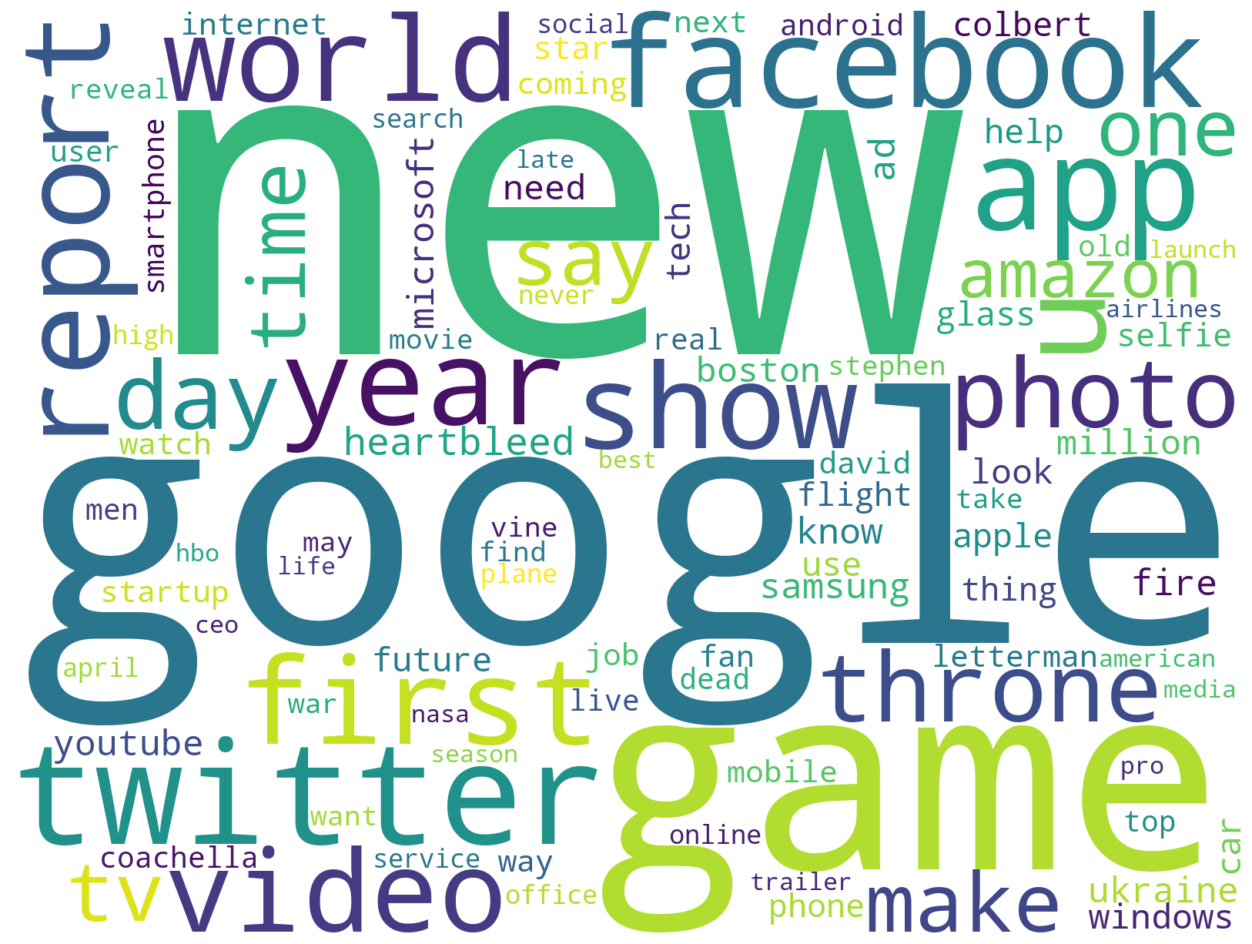

In [167]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [168]:
data["title"] =  data["title"].astype(str).apply(text_prepare)

In [169]:
data['num_tokens_in_title'] = data['title'].str.split().apply(len)

In [170]:
data.head(1)

,title,text,unique_tokens_rate,num_hrefs,num_videos,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Tech,num_tokens_in_title
0,time youtube competitor,It was reported last week that Yahoo is gettin...,0.640816,5,1,5,1459.5,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.02449,0.25,0.25,1600,31,3,9,1600.0,0,0,4192.480491,1,0,0,0,3


In [171]:
import pandas as pd


correlation_matrix = data.corr()

correlation_with_shares = correlation_matrix['shares'].drop('shares')  


correlation_with_shares = correlation_with_shares.abs().sort_values(ascending=False)

print(correlation_with_shares)


num_hrefs                     0.074301
href_avg_shares               0.065409
unique_tokens_rate            0.060329
rolling_avg_7days             0.059061
data_channel_Tech             0.053434
multimedia_content            0.052050
num_keywords                  0.044015
avg_avg_key                   0.027467
data_channel_Business         0.026119
global_sentiment_polarity     0.025610
title_sentiment_polarity      0.024815
day                           0.023021
global_subjectivity           0.022757
title_subjectivity            0.021480
global_rate_positive_words    0.019037
data_channel_Entertainment    0.018053
data_channel_Lifestyle        0.016357
max_avg_key                   0.014456
num_videos                    0.012330
weekday                       0.010974
min_avg_key                   0.010040
is_weekend                    0.007057
avg_shares_per_day            0.007057
global_rate_negative_words    0.004837
month                         0.003701
num_tokens_in_title      

In [172]:
data.shape

(1003, 29)

In [173]:
from sklearn.feature_extraction.text import CountVectorizer

In [174]:
cv = CountVectorizer(ngram_range=(2,2),max_features=10)
cv_object = cv.fit(data['title'])



In [175]:
X = cv_object.transform(data['title'])
print(X.shape)
X.toarray()

(1003, 10)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [176]:
cv_object.get_feature_names_out()

array(['amazon fire', 'april fools', 'david letterman', 'fire tv',
       'game thrones', 'google glass', 'need know', 'stephen colbert',
       'world cup', 'year old'], dtype=object)

In [177]:
df_ngram = pd.DataFrame(X.toarray(),columns=cv_object.get_feature_names_out())
print(df_ngram.shape)
df_ngram.head()

(1003, 10)


,amazon fire,april fools,david letterman,fire tv,game thrones,google glass,need know,stephen colbert,world cup,year old
0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [178]:
df.columns

Index(['title', 'text', 'unique_tokens_rate', 'num_hrefs', 'num_videos',
       'num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key',
       'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'title_subjectivity', 'title_sentiment_polarity', 'shares', 'day',
       'month', 'multimedia_content', 'rolling_avg_7days', 'weekday',
       'is_weekend', 'avg_shares_per_day', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Tech'],
      dtype='object')

0

In [111]:
# df_final = pd.concat([data.reset_index(drop=True),df_ngram.reset_index(drop=True)],axis=1)
# df_final.shape

(1003, 50)

In [75]:
# df_final.head()

,title,text,unique_tokens_rate,num_hrefs,num_videos,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Tech,num_tokens_in_title,amazon fire,april fools,david letterman,fire tv,game thrones,google glass,need know,stephen colbert,world cup,year old
0,time youtube competitor,It was reported last week that Yahoo is gettin...,0.640816,5,1,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,31,3,9,1600.0,0,0,4192.480491,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0
1,ultimate roundup biggest april fools day pranks,April Fools' marks the day when pranking goes ...,0.549618,4,0,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,1,4,5,1550.0,1,0,4192.480491,0,0,0,1,7,0,1,0,0,0,0,0,0,0,0
2,selfie one garish jacket red sox white house,The 2013 World Series champion Boston Red Sox ...,0.577236,8,0,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,1,4,9,1500.0,1,0,4192.480491,0,0,0,1,8,0,0,0,0,0,0,0,0,0,0
3,african telecom proposes diverse emoticons,Less than a week after Apple pledged to make i...,0.525896,4,0,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,1,4,5,1450.0,1,0,4192.480491,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0
4,google launch improved android camera app repo...,Android users may soon see a series of new fea...,0.588889,6,0,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,1,4,15,1760.0,1,0,4192.480491,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df["text"]

In [181]:
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.replace("\d+"," ") 
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) 
    text = text.lower() # lowercase text
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) 
    text = BAD_SYMBOLS_RE.sub(" ", text) 
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) 
    text = text.strip()
    return text

data_text = data["text"].astype(str).apply(text_prepare)
data_text.head()

0    reported last week yahoo getting online video ...
1    april fools marks day pranking goes corporate ...
2    world series champion boston red sox visited w...
3    less week apple pledged make emoticons raciall...
4    android users may soon see series new features...
Name: text, dtype: object

In [182]:
text = " ".join(sent for sent in data_text)
print("There are {} words in the text.".format(len(text)))

There are 1796245 words in the text.


In [183]:
data["text"] =  data["text"].astype(str).apply(text_prepare)

In [184]:
print(data["text"][2])

world series champion boston red sox visited white house tuesday president customary meeting teams win american sports titles chris bosh photobombs aside usually pretty buttoned affairs sox completed visit style red sox win white house presidential selfie none david ortiz one um go patriotic suit jackets ever seen seealso url let start ortiz boston sports hero known coming huge biggest moments tuesday exception one finds oneself white house presenting personalized obama jersey president united states america one must nab selfie first sports fan clearly honor thanks #selfie opens new window new window pic twitter com ywwseid opens new window david ortiz april opens new window thankfully boston globe hand give us behind scenes peek historic moment major league baseball art selfie david ortiz took selfie new window #redsox opens new window white house ceremony new window pic twitter com knxktsan opens new window boston globe sports april opens new window wait ortiz obama may even created 

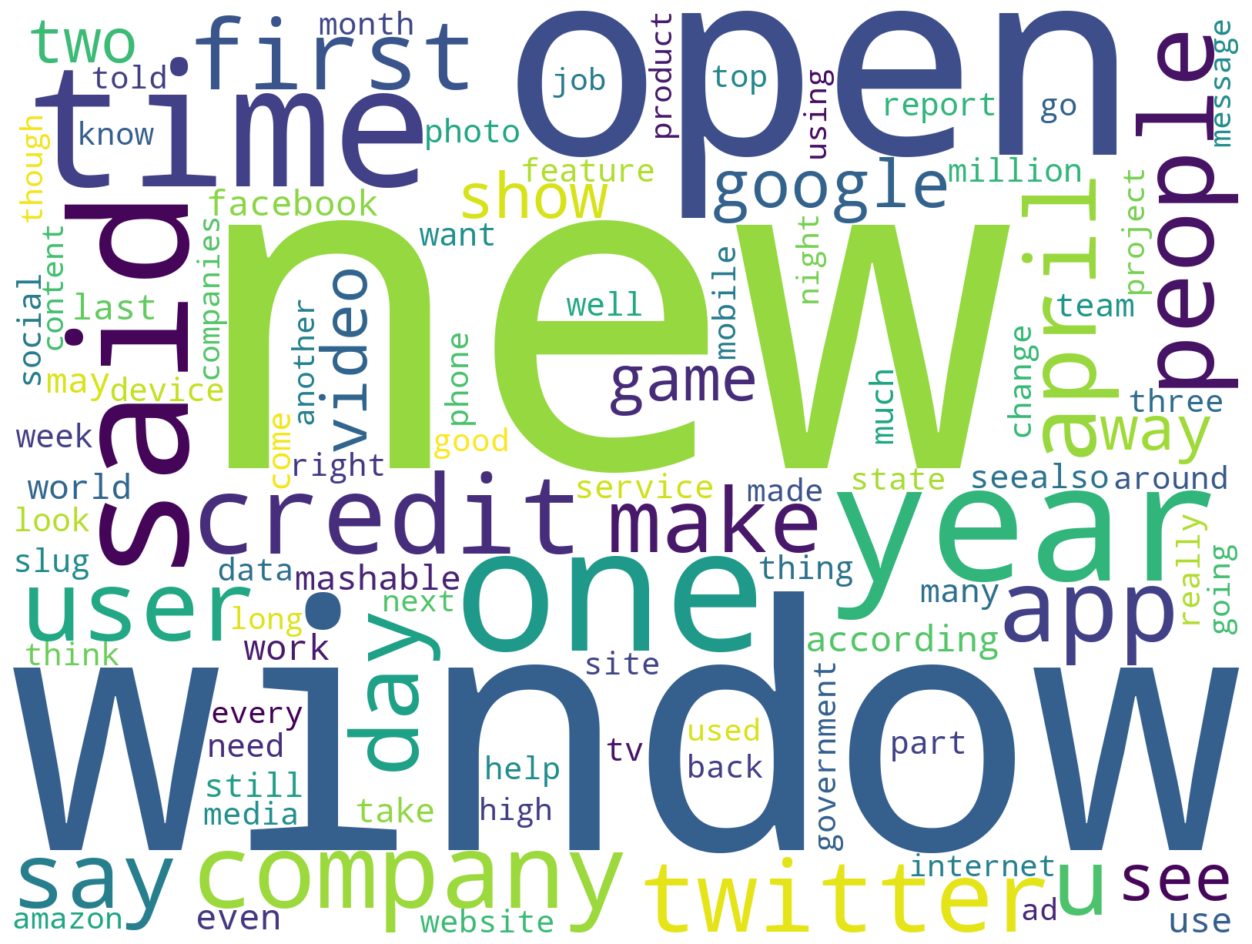

In [185]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [186]:
data['num_tokens_in_text'] = data['text'].str.split().apply(len)

In [188]:
import pandas as pd


correlation_matrix = data.corr()

correlation_with_shares = correlation_matrix['shares'].drop('shares')  


correlation_with_shares = correlation_with_shares.abs().sort_values(ascending=False)

print(correlation_with_shares)


num_tokens_in_text            0.179530
num_hrefs                     0.074301
href_avg_shares               0.065409
unique_tokens_rate            0.060329
rolling_avg_7days             0.059061
data_channel_Tech             0.053434
multimedia_content            0.052050
num_keywords                  0.044015
avg_avg_key                   0.027467
data_channel_Business         0.026119
global_sentiment_polarity     0.025610
title_sentiment_polarity      0.024815
day                           0.023021
global_subjectivity           0.022757
title_subjectivity            0.021480
global_rate_positive_words    0.019037
data_channel_Entertainment    0.018053
data_channel_Lifestyle        0.016357
max_avg_key                   0.014456
num_videos                    0.012330
weekday                       0.010974
min_avg_key                   0.010040
is_weekend                    0.007057
avg_shares_per_day            0.007057
global_rate_negative_words    0.004837
month                    

In [189]:
cv = CountVectorizer(ngram_range=(2,2),max_features=20)
# cv = CountVectorizer()
cv_object = cv.fit(data['text'])



In [190]:
X = cv_object.transform(data['text'])
print(X.shape)
X.toarray()

(1003, 20)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 3, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [191]:

feature_names = cv_object.get_feature_names_out()
feature_names

array(['april opens', 'fire tv', 'game thrones', 'last week', 'last year',
       'new window', 'new york', 'nggallery id', 'opens new',
       'pic twitter', 'san francisco', 'see also', 'seealso slug',
       'social media', 'told mashable', 'twitter com', 'window new',
       'window pic', 'year old', 'yes yes'], dtype=object)

In [192]:
prefix = 'Text_'  # You can change this prefix as needed
new_feature_names = [prefix + feature for feature in feature_names]
new_feature_names

['Text_april opens',
 'Text_fire tv',
 'Text_game thrones',
 'Text_last week',
 'Text_last year',
 'Text_new window',
 'Text_new york',
 'Text_nggallery id',
 'Text_opens new',
 'Text_pic twitter',
 'Text_san francisco',
 'Text_see also',
 'Text_seealso slug',
 'Text_social media',
 'Text_told mashable',
 'Text_twitter com',
 'Text_window new',
 'Text_window pic',
 'Text_year old',
 'Text_yes yes']

In [193]:
df_ngram1 = pd.DataFrame(X.toarray(),columns=new_feature_names)
print(df_ngram1.shape)
df_ngram1.head()


(1003, 20)


,Text_april opens,Text_fire tv,Text_game thrones,Text_last week,Text_last year,Text_new window,Text_new york,Text_nggallery id,Text_opens new,Text_pic twitter,Text_san francisco,Text_see also,Text_seealso slug,Text_social media,Text_told mashable,Text_twitter com,Text_window new,Text_window pic,Text_year old,Text_yes yes
0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,17,0,0,13,5,0,0,0,0,0,5,1,3,0,0
3,0,0,0,1,0,2,0,0,2,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [194]:
data.head()

,title,text,unique_tokens_rate,num_hrefs,num_videos,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Tech,num_tokens_in_title,num_tokens_in_text
0,time youtube competitor,reported last week yahoo getting online video ...,0.640816,5,1,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,31,3,9,1600.0,0,0,4192.480491,1,0,0,0,3,103
1,ultimate roundup biggest april fools day pranks,april fools marks day pranking goes corporate ...,0.549618,4,0,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,1,4,5,1550.0,1,0,4192.480491,0,0,0,1,7,52
2,selfie one garish jacket red sox white house,world series champion boston red sox visited w...,0.577236,8,0,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,1,4,9,1500.0,1,0,4192.480491,0,0,0,1,8,244
3,african telecom proposes diverse emoticons,less week apple pledged make emoticons raciall...,0.525896,4,0,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,1,4,5,1450.0,1,0,4192.480491,0,0,0,1,5,143
4,google launch improved android camera app repo...,android users may soon see series new features...,0.588889,6,0,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,1,4,15,1760.0,1,0,4192.480491,0,0,0,0,8,149


AttributeError: 'int' object has no attribute 'reset_index'

In [195]:
from collections import Counter

def pos_counter(x,pos):
   
    tokens = nltk.word_tokenize(x.lower())
    tokens = [word for word in tokens if word not in STOPWORDS_nlp]
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags)
    return counts[pos]

data['Noun_Counts'] = data['text'].apply(lambda x: pos_counter(x,'NN'))
data['Verb_Counts'] = data['text'].apply(lambda x: (pos_counter(x,'VB')+pos_counter(x,'RB')))
data['Adjective_Counts'] = data['text'].apply(lambda x: pos_counter(x,'JJ'))

In [197]:
data.head(1)

,title,text,unique_tokens_rate,num_hrefs,num_videos,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Tech,num_tokens_in_title,num_tokens_in_text,Noun_Counts,Verb_Counts,Adjective_Counts
0,time youtube competitor,reported last week yahoo getting online video ...,0.640816,5,1,5,1459.5,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.02449,0.25,0.25,1600,31,3,9,1600.0,0,0,4192.480491,1,0,0,0,3,103,38,9,19


In [198]:
data.shape

(1003, 33)

In [199]:
concatenated_df = pd.concat([data, df_ngram, df_ngram1], axis=1)

In [201]:
concatenated_df.shape

(1003, 63)

In [202]:
concatenated_df.drop(["title","text"],axis=1,inplace=True)

In [206]:
concatenated_df.head(1)

,unique_tokens_rate,num_hrefs,num_videos,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Tech,num_tokens_in_title,num_tokens_in_text,Noun_Counts,Verb_Counts,Adjective_Counts,amazon fire,april fools,david letterman,fire tv,game thrones,google glass,need know,stephen colbert,world cup,year old,Text_april opens,Text_fire tv,Text_game thrones,Text_last week,Text_last year,Text_new window,Text_new york,Text_nggallery id,Text_opens new,Text_pic twitter,Text_san francisco,Text_see also,Text_seealso slug,Text_social media,Text_told mashable,Text_twitter com,Text_window new,Text_window pic,Text_year old,Text_yes yes
0,0.640816,5,1,5,1459.5,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.02449,0.25,0.25,1600,31,3,9,1600.0,0,0,4192.480491,1,0,0,0,3,103,38,9,19,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [207]:
concatenated_df.shape

(1003, 61)

In [210]:
concatenated_df.isnull().sum().sum()

0

In [211]:
import pandas as pd


correlation_matrix = concatenated_df.corr()

correlation_with_shares = correlation_matrix['shares'].drop('shares')  


correlation_with_shares = correlation_with_shares.abs().sort_values(ascending=False)
  # Display all rows
correlation_with_shares



Adjective_Counts              0.184683
num_tokens_in_text            0.179530
Noun_Counts                   0.167476
Verb_Counts                   0.166068
Text_opens new                0.137624
Text_new window               0.124437
Text_san francisco            0.100789
num_hrefs                     0.074301
href_avg_shares               0.065409
unique_tokens_rate            0.060329
rolling_avg_7days             0.059061
data_channel_Tech             0.053434
multimedia_content            0.052050
Text_window new               0.044540
num_keywords                  0.044015
Text_seealso slug             0.037896
Text_new york                 0.030218
avg_avg_key                   0.027467
data_channel_Business         0.026119
global_sentiment_polarity     0.025610
title_sentiment_polarity      0.024815
day                           0.023021
global_subjectivity           0.022757
title_subjectivity            0.021480
global_rate_positive_words    0.019037
data_channel_Entertainmen

Index(['Text_opens new', 'Text_new window', 'Text_san francisco', 'num_hrefs',
       'href_avg_shares', 'unique_tokens_rate', 'rolling_avg_7days',
       'data_channel_Tech', 'multimedia_content', 'Text_window new',
       'num_keywords', 'Text_seealso slug', 'Text_new york', 'avg_avg_key',
       'data_channel_Business', 'global_sentiment_polarity',
       'title_sentiment_polarity', 'day', 'global_subjectivity',
       'title_subjectivity', 'global_rate_positive_words',
       'data_channel_Entertainment', 'Text_last year',
       'data_channel_Lifestyle', 'max_avg_key', 'num_videos', 'fire tv',
       'article_id', 'weekday', 'game thrones'],
      dtype='object')

In [212]:
concatenated_df.dtypes

unique_tokens_rate    float64
num_hrefs               int64
num_videos              int64
num_keywords            int64
min_avg_key           float64
                       ...   
Text_twitter com        int64
Text_window new         int64
Text_window pic         int64
Text_year old           int64
Text_yes yes            int64
Length: 61, dtype: object

In [213]:
columns_to_convert = ["data_channel_Business", "data_channel_Entertainment", "data_channel_Lifestyle", "data_channel_Tech"]

concatenated_df[columns_to_convert] = concatenated_df[columns_to_convert].astype(int)


In [216]:
concatenated_df

,unique_tokens_rate,num_hrefs,num_videos,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,day,month,multimedia_content,rolling_avg_7days,weekday,is_weekend,avg_shares_per_day,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Tech,num_tokens_in_title,num_tokens_in_text,Noun_Counts,Verb_Counts,Adjective_Counts,amazon fire,april fools,david letterman,fire tv,game thrones,google glass,need know,stephen colbert,world cup,year old,Text_april opens,Text_fire tv,Text_game thrones,Text_last week,Text_last year,Text_new window,Text_new york,Text_nggallery id,Text_opens new,Text_pic twitter,Text_san francisco,Text_see also,Text_seealso slug,Text_social media,Text_told mashable,Text_twitter com,Text_window new,Text_window pic,Text_year old,Text_yes yes
0,0.640816,5,1,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600,31,3,9,1600.000000,0,0,4192.480491,1,0,0,0,3,103,38,9,19,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.549618,4,0,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500,1,4,5,1550.000000,1,0,4192.480491,0,0,0,1,7,52,16,4,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.577236,8,0,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400,1,4,9,1500.000000,1,0,4192.480491,0,0,0,1,8,244,97,16,55,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,17,0,0,13,5,0,0,0,0,0,5,1,3,0,0
3,0.525896,4,0,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300,1,4,5,1450.000000,1,0,4192.480491,0,0,0,1,5,143,53,13,26,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,2,0,0,1,1,0,0,0,0,0,0,0
4,0.588889,6,0,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000,1,4,15,1760.000000,1,0,4192.480491,0,0,0,0,8,149,44,12,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0.606557,6,0,4,3329.921,5709.823,4020.608,1950.000,0.493519,-0.119440,0.005376,0.021505,0.000000,0.000000,1300,17,4,8,4092.347945,3,0,4192.480491,1,0,0,0,6,49,16,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
999,0.491018,4,0,6,0.000,4352.491,2358.572,4200.000,0.455042,0.191196,0.053731,0.011940,0.000000,0.000000,1100,17,4,6,4084.172131,3,0,4192.480491,0,0,0,1,6,128,60,4,19,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,3,0,0,3,1,0,0,0,0,0,1,0,0,0,0
1000,0.634518,3,2,9,2126.118,6060.771,3296.052,3400.000,0.522917,0.009809,0.025381,0.045685,0.600000,-0.600000,4400,17,4,5,4085.032698,3,0,4192.480491,0,1,0,0,10,83,35,6,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0.447368,7,0,8,0.000,4763.083,2709.129,0.000,0.494445,0.144969,0.069903,0.020388,0.833333,0.433333,1900,17,4,8,4079.095109,3,0,4192.480491,1,0,0,0,5,444,164,30,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0


# ML Model Building

In [217]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


X = concatenated_df.drop('shares', axis=1)  
y = concatenated_df['shares']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=30)

X_rfe = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.support_]

print(selected_features)


Index(['unique_tokens_rate', 'num_keywords', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_sentiment_polarity', 'month',
       'data_channel_Business', 'data_channel_Entertainment',
       'data_channel_Lifestyle', 'data_channel_Tech', 'amazon fire',
       'david letterman', 'fire tv', 'game thrones', 'google glass',
       'world cup', 'year old', 'Text_last year', 'Text_new window',
       'Text_new york', 'Text_opens new', 'Text_pic twitter',
       'Text_san francisco', 'Text_seealso slug', 'Text_told mashable',
       'Text_window new', 'Text_window pic', 'Text_year old'],
      dtype='object')


In [224]:
concatenated_df[selected_features].shape

(1003, 30)

In [220]:
concatenated_df["shares"].shape

(1003,)

In [232]:
concatenated_df.columns

Index(['unique_tokens_rate', 'num_hrefs', 'num_videos', 'num_keywords',
       'min_avg_key', 'max_avg_key', 'avg_avg_key', 'href_avg_shares',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'title_subjectivity', 'title_sentiment_polarity', 'shares', 'day',
       'month', 'multimedia_content', 'rolling_avg_7days', 'weekday',
       'is_weekend', 'avg_shares_per_day', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Tech', 'num_tokens_in_title', 'num_tokens_in_text',
       'Noun_Counts', 'Verb_Counts', 'Adjective_Counts', 'amazon fire',
       'april fools', 'david letterman', 'fire tv', 'game thrones',
       'google glass', 'need know', 'stephen colbert', 'world cup', 'year old',
       'Text_april opens', 'Text_fire tv', 'Text_game thrones',
       'Text_last week', 'Text_last year', 'Text_new window', 'Text_new york',
       'Text_nggalle

In [223]:
from sklearn.model_selection import train_test_split

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = concatenated_df.drop("shares", axis=1)
y = concatenated_df["shares"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 2196052709.617336
Root Mean Squared Error: 46862.0604499774
R-squared (R2) Score: -0.00925860153201219


In [238]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



X = concatenated_df.drop(columns=['shares'])  
y = concatenated_df['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


n_components = 5  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error: 2167008144.537018
Root Mean Squared Error: 46551.1347287799
R-squared (R2) Score: 0.004089656006020959


In [246]:
from sklearn.ensemble import RandomForestRegressor

X = concatenated_df.drop(columns=['shares'])  
y = concatenated_df['shares']

rf_model = RandomForestRegressor()

rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.round(2)


,Feature,Importance
29,Adjective_Counts,0.27
17,rolling_avg_7days,0.06
0,unique_tokens_rate,0.06
27,Noun_Counts,0.05
7,href_avg_shares,0.05
26,num_tokens_in_text,0.05
5,max_avg_key,0.04
28,Verb_Counts,0.03
6,avg_avg_key,0.03
1,num_hrefs,0.03


In [247]:
threshold = 0.02

selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

X_selected = X[selected_features]

print(selected_features)


29             Adjective_Counts
17            rolling_avg_7days
0            unique_tokens_rate
27                  Noun_Counts
7               href_avg_shares
26           num_tokens_in_text
5                   max_avg_key
28                  Verb_Counts
6                   avg_avg_key
1                     num_hrefs
9     global_sentiment_polarity
8           global_subjectivity
18                      weekday
16           multimedia_content
12           title_subjectivity
Name: Feature, dtype: object


In [248]:
selected_features.values

array(['Adjective_Counts', 'rolling_avg_7days', 'unique_tokens_rate',
       'Noun_Counts', 'href_avg_shares', 'num_tokens_in_text',
       'max_avg_key', 'Verb_Counts', 'avg_avg_key', 'num_hrefs',
       'global_sentiment_polarity', 'global_subjectivity', 'weekday',
       'multimedia_content', 'title_subjectivity'], dtype=object)

In [251]:
comp_df=concatenated_df[['Adjective_Counts', 'rolling_avg_7days', 'unique_tokens_rate','Noun_Counts', 'href_avg_shares', 'num_tokens_in_text','max_avg_key', 'Verb_Counts', 'avg_avg_key', 'num_hrefs','global_sentiment_polarity', 'global_subjectivity', 'weekday','multimedia_content', 'title_subjectivity']]

In [252]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score



X = comp_df  
y = concatenated_df["shares"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso()

alphas = [0.01, 0.1, 1, 10]

param_grid = {'alpha': alphas}

lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.best_params_['alpha']

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Best Alpha: 10
Mean Squared Error: 2170733342.2278495
Root Mean Squared Error: 46591.129437134805
R-squared (R2) Score: 0.00237763525378043
